In [615]:
# load original data
import pandas as pd
import numpy as np
data = pd.read_csv('./data/americaData.csv')
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
0,0,United States of America,971002,24632468,0,10845438,410378,2021/1/22 23:40
1,1,United States of America,971002,24632468,0,10845438,410378,2021/1/22 20:56
2,2,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:16
3,3,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:14
4,4,United States of America,971002,24619597,0,10845438,409877,2021/1/22 15:21
5,5,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:40
6,6,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:13
7,7,United States of America,971002,24432829,0,10562082,406001,2021/1/22 11:04
8,8,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:23
9,9,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:02


In [616]:
# order the data by time
data['updateTime'] = pd.to_datetime(data['updateTime'])
data = data[::-1]
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
2566,2566,United States of America,971002,5,0,0,0,2020-01-27 17:20:00
2565,2565,United States of America,971002,6,0,0,0,2020-01-31 07:17:00
2564,2564,United States of America,971002,6,0,0,0,2020-02-01 02:48:00
2563,2563,United States of America,971002,8,0,0,0,2020-02-02 07:41:00
2562,2562,United States of America,971002,9,0,0,0,2020-02-03 09:28:00
2561,2561,United States of America,971002,11,0,0,0,2020-02-04 07:11:00
2560,2560,United States of America,971002,12,0,0,0,2020-02-06 10:59:00
2559,2559,United States of America,971002,12,0,0,0,2020-02-10 14:08:00
2558,2558,United States of America,971002,12,0,0,0,2020-02-10 15:19:00
2557,2557,United States of America,971002,12,0,0,0,2020-02-10 15:27:00


In [617]:
# fetch the columns we need
data = data[['updateTime', 'province_confirmedCount']]
data.reset_index(drop=True, inplace=True)
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27 17:20:00,5
1,2020-01-31 07:17:00,6
2,2020-02-01 02:48:00,6
3,2020-02-02 07:41:00,8
4,2020-02-03 09:28:00,9
5,2020-02-04 07:11:00,11
6,2020-02-06 10:59:00,12
7,2020-02-10 14:08:00,12
8,2020-02-10 15:19:00,12
9,2020-02-10 15:27:00,12


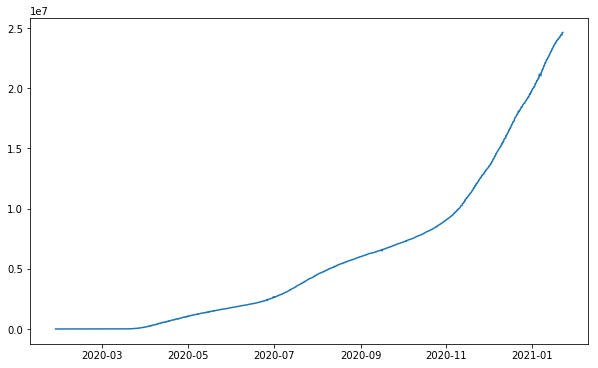

In [618]:
# plot the total count trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['updateTime'], data['province_confirmedCount'])

In [619]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 2 columns):
updateTime                 2567 non-null datetime64[ns]
province_confirmedCount    2567 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 40.2 KB


In [620]:
# normalize the datetime field
data['updateTime'] = pd.to_datetime(data['updateTime']).dt.normalize()
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27,5
1,2020-01-31,6
2,2020-02-01,6
3,2020-02-02,8
4,2020-02-03,9
5,2020-02-04,11
6,2020-02-06,12
7,2020-02-10,12
8,2020-02-10,12
9,2020-02-10,12


In [621]:
# group the data by date
data.columns = ['date', 'confirmedCount']
data_merge = data['confirmedCount'].groupby(data['date']).max()
data_merge = data_merge.to_frame()
data_merge.head(30)

,confirmedCount
date,
2020-01-27,5
2020-01-31,6
2020-02-01,6
2020-02-02,8
2020-02-03,9
2020-02-04,11
2020-02-06,12
2020-02-10,12
2020-02-11,13


In [622]:
# calculate the diff between this date and the last date (new added count)
data_merge['lastDayConfirmedCount'] = data_merge['confirmedCount'].shift(1)
data_merge['diffCount'] = data_merge['confirmedCount'] - data_merge['lastDayConfirmedCount']
data_diff = data_merge[['diffCount']]
data_diff = data_diff.dropna(axis=0, how='any', subset=['diffCount'])
data_diff

,diffCount
date,
2020-01-31,1.0
2020-02-01,0.0
2020-02-02,2.0
2020-02-03,1.0
2020-02-04,2.0
...,...
2021-01-18,169786.0
2021-01-19,150130.0
2021-01-20,175511.0


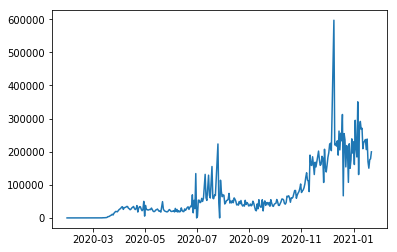

In [623]:
plt.plot(data_diff)

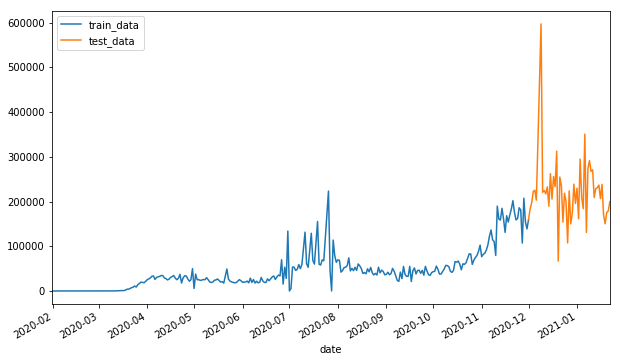

In [624]:
# split training data and test data
split_date = pd.to_datetime('2020-12-01')
# data = data_merge['confirmedCount']
data = data_diff['diffCount']
train_data = data.loc[:split_date]
test_data = data.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train_data.plot()
test_data.plot(ax=ax)
plt.legend(['train_data', 'test_data'])

In [625]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_sc = scaler.fit_transform(train_data.to_frame())
test_sc = scaler.transform(test_data.to_frame())
test_sc

array([[0.71432985],
       [0.82007192],
       [0.88127191],
       [0.99537877],
       [1.00900961],
       [0.90925904],
       [2.6732358 ],
       [0.98766328],
       [1.00645719],
       [0.97190093],
       [1.04234787],
       [0.84913822],
       [1.17439335],
       [0.91981802],
       [1.14547034],
       [1.04356139],
       [1.39880081],
       [0.29883977],
       [1.1402222 ],
       [1.05462638],
       [0.6897997 ],
       [0.97827304],
       [0.89270857],
       [0.48080083],
       [1.00240018],
       [0.67134164],
       [0.78112728],
       [1.06906774],
       [0.87677606],
       [1.02878867],
       [0.72228715],
       [1.32008311],
       [0.9353296 ],
       [0.82394981],
       [1.56982675],
       [0.58615332],
       [1.22809728],
       [1.30491633],
       [1.19753534],
       [1.21222746],
       [0.93562962],
       [1.02427939],
       [1.03273374],
       [1.06038054],
       [0.92391085],
       [1.0670661 ],
       [0.76029142],
       [0.672

In [626]:
# get train & test data
def getXYSequence(dataset, window_size):
    dataX, dataY = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i : (i + window_size)]
        dataX.append(a)
        dataY.append(dataset[i + window_size])

    return np.array(dataX), np.array(dataY)
window_size = 15
X_train, y_train = getXYSequence(train_sc, window_size)
X_test, y_test = getXYSequence(test_sc, window_size)

In [627]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(277, 15, 1) (277, 1) (35, 15, 1) (35, 1)


In [628]:
X_train[0]

array([[4.47793943e-06],
       [0.00000000e+00],
       [8.95587886e-06],
       [4.47793943e-06],
       [8.95587886e-06],
       [4.47793943e-06],
       [0.00000000e+00],
       [4.47793943e-06],
       [0.00000000e+00],
       [4.47793943e-06],
       [4.47793943e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]])

In [629]:
# create lstm model and train
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(window_size, X_train.shape[2]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=True)

Epoch 1/100
277/277 [==============================] - 1s 4ms/step - loss: 0.0183
Epoch 2/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 3/100
277/277 [==============================] - 2s 6ms/step - loss: 0.0094
Epoch 4/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0087
Epoch 5/100
277/277 [==============================] - 1s 4ms/step - loss: 0.0078
Epoch 6/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 7/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0082
Epoch 8/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 9/100
277/277 [==============================] - 2s 6ms/step - loss: 0.0084
Epoch 10/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0085
Epoch 11/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0081
Epoch 12/100
277/277 [==============================] - 1s 5ms/step - loss: 0.0081
Epoch 13/100


In [630]:
# lstm test dataset evaluate mse
lstm_test_mse = lstm_model.evaluate(X_test, y_test, batch_size=1)
print(lstm_test_mse)

35/35 [==============================] - 0s 3ms/step - loss: 0.0760
0.07599754631519318


In [631]:
# prediction result
lstm_y_predict = lstm_model.predict(X_test)
# lstm_y_train_predict = lstm_model.predict(X_train)
lstm_y_predict = scaler.inverse_transform(lstm_y_predict)
lstm_y_predict
# lstm_y_train_predict = scaler.inverse_transform(lstm_y_train_predict)

array([[196647.66],
       [200308.89],
       [199096.36],
       [154566.12],
       [185233.78],
       [185719.64],
       [192009.34],
       [190640.72],
       [186452.81],
       [181057.33],
       [170803.34],
       [168588.64],
       [173557.34],
       [169534.64],
       [178434.14],
       [188218.84],
       [192206.84],
       [183780.27],
       [191231.94],
       [203376.62],
       [185064.6 ],
       [181780.23],
       [195308.38],
       [194345.27],
       [205161.44],
       [212481.4 ],
       [215152.38],
       [211859.92],
       [204241.02],
       [201107.55],
       [201996.52],
       [200494.8 ],
       [199009.39],
       [197774.52],
       [186415.45]], dtype=float32)

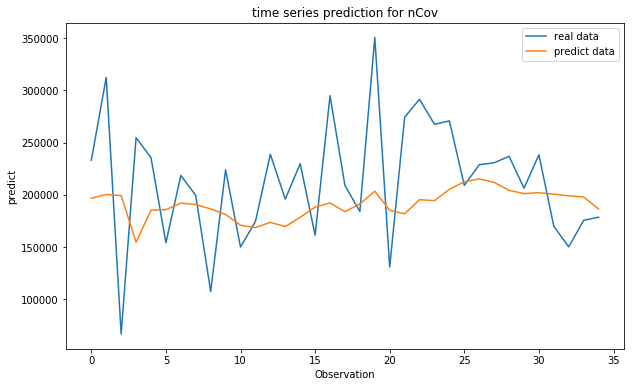

In [632]:
real_y_test = scaler.inverse_transform(y_test)
# real_y_train = scaler.inverse_transform(y_train)
plt.figure(figsize=(10, 6))
# axreal = plt.plot(real_y_train, label='real data')
# axpredict = plt.plot(lstm_y_train_predict, label='predict data')
plt.plot(real_y_test, label='real data')
plt.plot(lstm_y_predict, label='predict data')
plt.title('time series prediction for nCov')
plt.xlabel('Observation')
plt.ylabel('predict')
plt.legend()
plt.show()